# Regresión

Para esta parte del laboratorio, utilizaremos el método de regresión; cuyo objetivo será explorar el dataset entregado ( caso_estudio.csv ) , donde debemos analizar y resolver las preguntas dejadas a continuación:

1. Analice el dataset entregado e identifique que encontró.

2. Debemos utilizar los algoritmos de regresión lineal y regresión polinomial, para ello , en esta parte del codigo clf = SVR(kernel='linear') , debemos colocar 'linear' o 'poly'

3. Para este estudio de regresión, debemos realizarlo con los siguientes casos:
  
  3.1. Utilice todos los datos del dataset, si encuentra datos que no cuadran proponga alguna solución para poder dar solución al problema ( para este punto no borren las filas )
  
  3.2 Utilice los siguientes porcentajes de datos del dataset: 30% , 50% , 70% , 90% ¿ qué diferencias encuentra a la hora de realizar el estudio del dataset ?

  3.2.1 ¿ Qué cambios observa en los datos de entrenamiento y validación ? ¿ corresponde al 25% de los datos y 75% de los datos especificamente ? , argumente su respuesta.

  3.2.2 Documente los tiempos obtenidos y el porcentaje de precisión y realice una interpretación de los resultados obtenidos.

  3.2.3. Dibuje la regresión del punto 2.2 e interprete los resultados de la misma

  2.2.4 ¿ Cuál porcentaje de uso del dataset considera que es ideal para el estudio ? , argumente su respuesta.

Pueden utilizar el codigo como crean conveniente , y pueden cambiar las variables que crean necesarias para dar solución al ejercicio.

Deben evaluarlo tanto para linear y poly.

Investigación: Existe otro metodo que es utilizando para este tipo de problemas RBF (Radial Basis Funtion) , explicar ¿ Qué es ? y usarlo en el desarrollo del laboratorio y responder las preguntas anteriormente mencionadas.

In [ ]:
# Manipulación de datos
import pandas as pd
# Operaciones numéricas
import numpy as np
# Para medición del tiempo que toma ejecutar los procesos
from time import time
# Para separar datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Librería para SVM
from sklearn.svm import SVR
# Medición de precisión
from sklearn.metrics import accuracy_score, confusion_matrix
# Generar gráficos
import matplotlib.pyplot as plt
#subir archivo
from google.colab import files
#visualizaciòn netamente estadistica
import seaborn as sns
#calculador del estandar
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
#Importa archivos desde la computadora
uploaded = files.upload()

Saving caso_estudio.csv to caso_estudio.csv


In [ ]:
df = pd.read_csv(r'caso_estudio.csv')
# Mostrar información sobre el set de datos
df.info()

df.head()

# Contar los valores únicos de una columna en un DataFrame
#gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,SeniorCitizen,MonthlyCharges
df['Outcome'].value_counts()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             735 non-null    float64
 3   SkinThickness             733 non-null    float64
 4   Insulin                   766 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [ ]:
# Crearemos un nuevo df llamado X (notar mayus) con las columnas de características
# Se obtiene generando una lista de columnas del df a utilizar
lista_caract = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]
# Luego tomando esa lista del df original
X = df[lista_caract]
# Mostraremos los primeros cinco registros para conocer cómo se compone X
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.0,35.0,0.0,33.6,0.627,50
1,1,85,66.0,29.0,0.0,26.6,0.351,31
2,8,183,64.0,0.0,0.0,23.3,0.672,32
3,1,89,66.0,23.0,94.0,28.1,0.167,21
4,0,137,40.0,35.0,168.0,43.1,2.288,33


In [ ]:
# Utilizaremos el mismo procedimiento para generar y
lista_etiq = ['Outcome']
y = df[lista_etiq]
y.head()


,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
# Separar en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y
)


In [ ]:
# Mostraremos la cantidad de datos a utilizar para el entrenamiento
X_train.shape
y_train.shape

(549, 1)

In [ ]:
# Luego, la cantidad de datos a utilizar para validar
X_test.shape
y_test.shape

(184, 1)

In [ ]:
# Definició del modelo que llamaremos clf para llamar a la regresiòn
clf = SVR(kernel='linear')

# Guardamos el registro del momento en el que empezamos el entrenamiento
hora_inicio = time()



In [ ]:
# Iniciamos el entrenamiento ejecutando el metodo fit
# Los valores que enviamos son los valores de X y y
#
# El .ravel() que final de y.values es un pequeño truco para cambiar su forma
# esto permite convertir una matriz de dos dimensiones en una sola dimesión,
# con ello, cada elemento de esta nueva matriz corresponde a un registro de X
clf.fit(X_train.values, y_train.values.ravel())

# Imprimimos el tiempo tomado para el entrenamiento
print("Entrenamiento terminado en {} segundos".format(time() - hora_inicio))


Entrenamiento terminado en 11.099467039108276 segundos


In [ ]:
# Otra vez guardaremos registro del tiempo que nos toma crear esta predicción
hora_inicio = time()
# Iniciamos la predicción con nuestra X de prueba
y_pred = clf.predict(X_test)
# Mostramos el tiempo tomado para la predicción
print("Predicción terminada en {} segundos".format(time() - hora_inicio))

Predicción terminada en 0.01150202751159668 segundos


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [ ]:
#coeficiente de determinaciòn
print(r2_score(y_test, y_pred))

0.3424586765615659


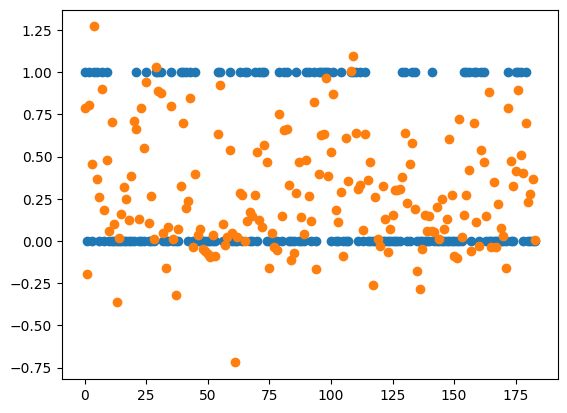

In [ ]:
cantidad_probar = len(y_test)
X_axis = np.arange(cantidad_probar)

fig, ax = plt.subplots()
ax.scatter(X_axis, y_test.iloc[0:cantidad_probar].values)
ax.scatter(X_axis, y_pred[0:cantidad_probar])
plt.show()

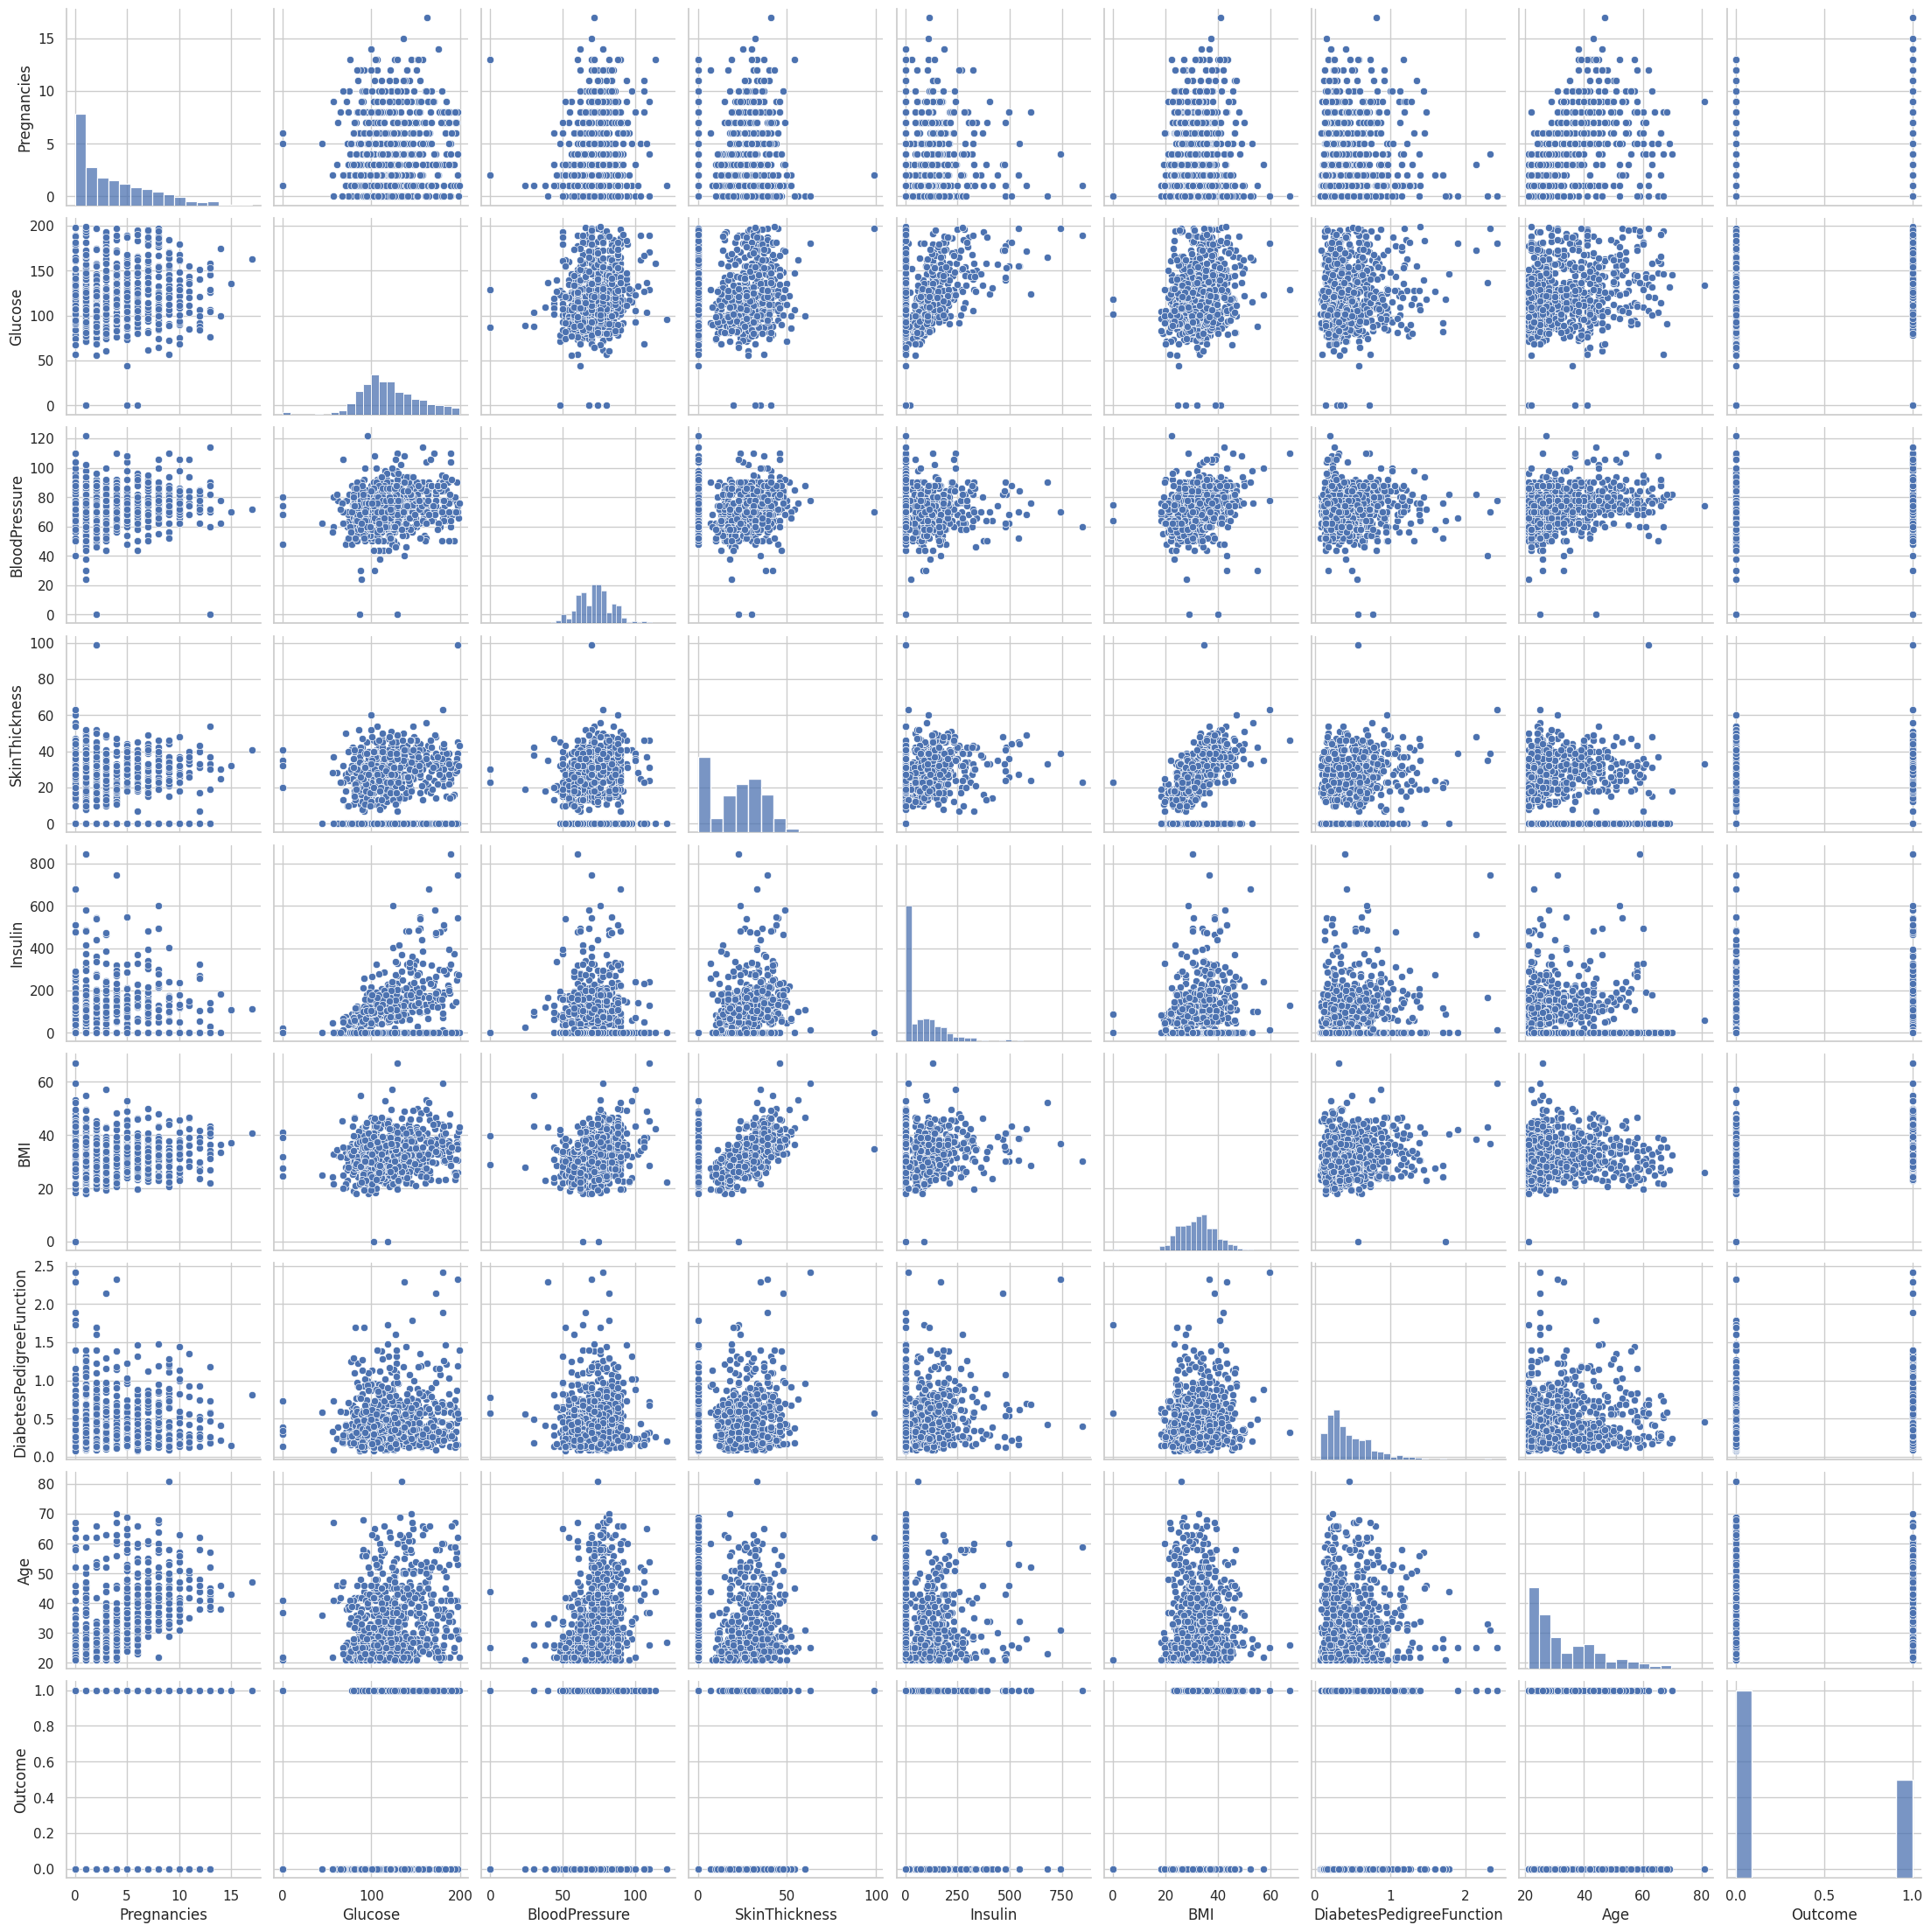

In [ ]:
sns.set_theme(style='whitegrid', context='notebook')
cols = ['Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age',
    'Outcome']
sns.pairplot(df[cols])
plt.show()

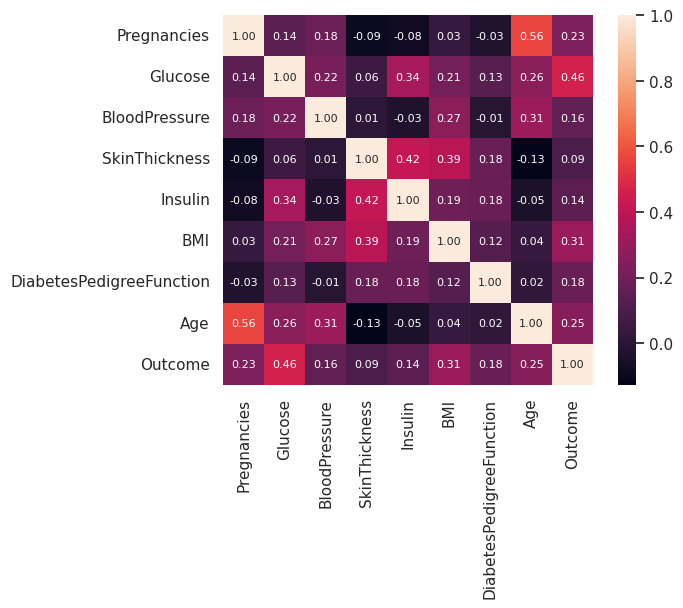

In [ ]:
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.0)
hm=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size':8}, yticklabels=cols, xticklabels=cols)
plt.show()